In [45]:
import pandas as pd
import numpy as np
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import statsmodels as sm

In [46]:
data =pd.read_csv ('/content/50_Startups.csv')
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [48]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [49]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [50]:
data[data.duplicated].sum()

R&D Spend          0.0
Administration     0.0
Marketing Spend    0.0
State              0.0
Profit             0.0
dtype: float64

In [51]:
data.shape

(50, 5)

In [52]:
data1 = data.rename({'R&D Spend':'R_d','Administration':'admin','Marketing Spend':'MS','State':'state','Profit':'profit'},axis =1)

In [53]:
data1.head()

,R_d,admin,MS,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


#correlation matrix

In [54]:
data1.corr()

<ipython-input-54-73ca661ddaf0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,R_d,admin,MS,profit
R_d,1.000000,0.241955,0.724248,0.972900
admin,0.241955,1.000000,-0.032154,0.200717
MS,0.724248,-0.032154,1.000000,0.747766
profit,0.972900,0.200717,0.747766,1.000000


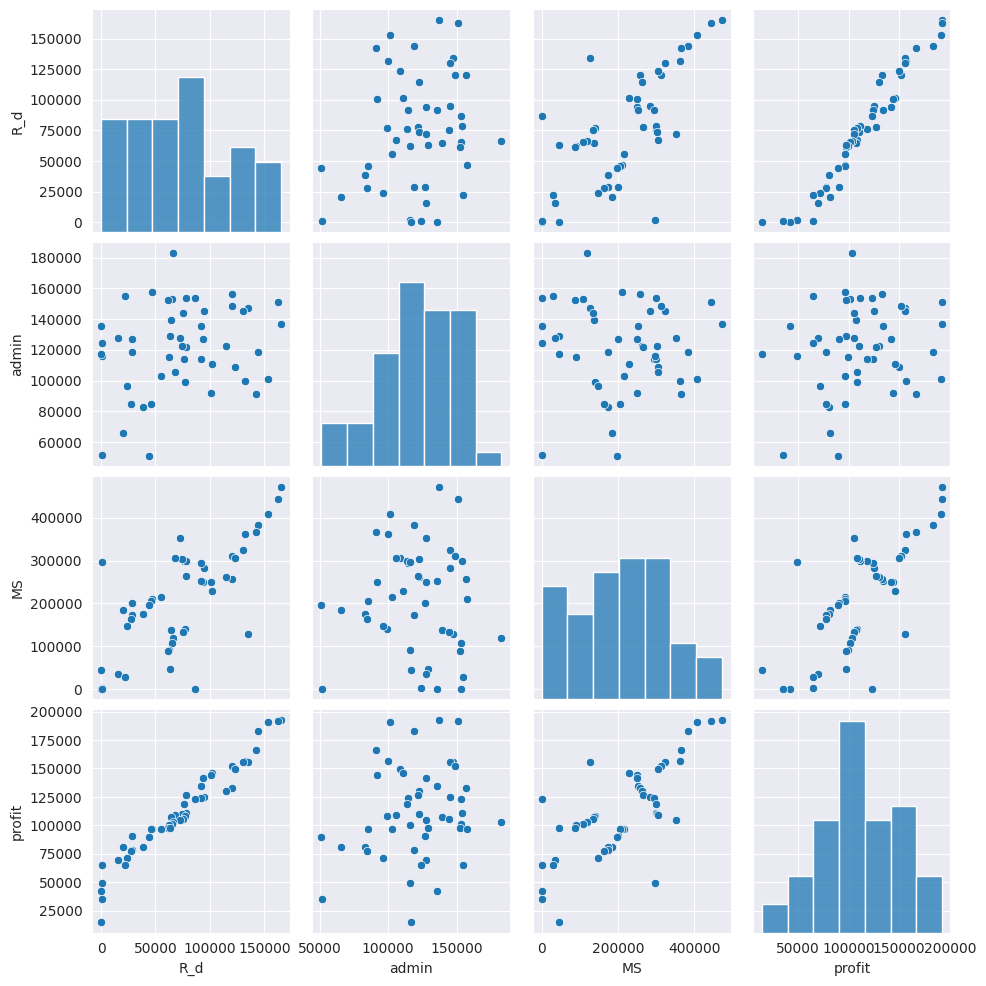

In [55]:
sns.set_style(style='darkgrid')
sns.pairplot(data1)

#Prepring model

In [56]:
model=smf.ols('profit ~ R_d+admin+MS',data =data1).fit()
model.params

Intercept    50122.192990
R_d              0.805715
admin           -0.026816
MS               0.027228
dtype: float64

In [57]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           4.53e-30
Time:                        18:11:25   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
R_d            0.8057      0.045     17.846      0.000       0.715       0.897
admin         -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [58]:
print(model.tvalues,'\n', model.pvalues)

Intercept     7.626218
R_d          17.846374
admin        -0.525507
MS            1.655077
dtype: float64 
 Intercept    1.057379e-09
R_d          2.634968e-22
admin        6.017551e-01
MS           1.047168e-01
dtype: float64


In [59]:
(model.rsquared,model.rsquared_adj)

(0.9507459940683246, 0.9475337762901719)

#simple linear regression

In [60]:
ml_rd=smf.ols('profit~R_d',data=data1).fit()
print(ml_rd.tvalues,'\n',ml_rd.pvalues)

Intercept    19.320288
R_d          29.151139
dtype: float64 
 Intercept    2.782697e-24
R_d          3.500322e-32
dtype: float64


#calculating VIF

In [61]:
rsq_R_d=smf.ols('R_d~admin+MS',data =data1).fit().rsquared
vif_R_d =1/(1-rsq_R_d)

rsq_admin=smf.ols('admin~R_d+MS',data =data1).fit().rsquared
vif_admin =1/(1-rsq_admin)

rsq_MS=smf.ols('MS~admin+R_d',data =data1).fit().rsquared
vif_MS =1/(1-rsq_MS)

# sorting vif values in a data frame
d1={'variables':['R_d','admin','MS'],'VIF':[vif_R_d,vif_admin,vif_MS]}
vif_frame=pd.DataFrame(d1)
vif_frame


,variables,VIF
0,R_d,2.468903
1,admin,1.175091
2,MS,2.326773


##Residual Analysis

# Test for normality of Residuals(Q-Q plot)

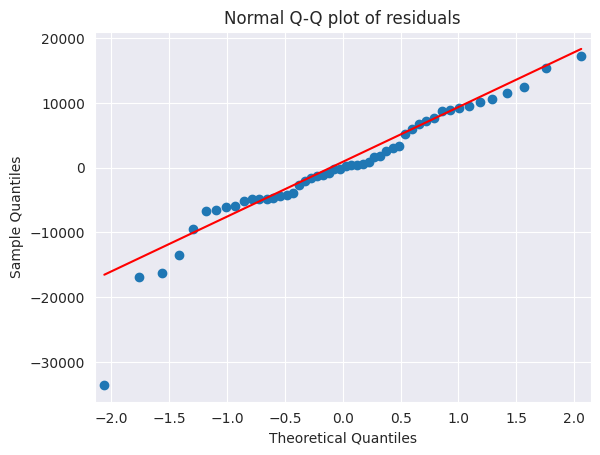

In [62]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') # line = 45 to draw the diagnoal line
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [63]:
list(np.where(model.resid<-15000))

[array([14, 15, 49])]


#Residual Plot for Homoscedasticity

In [64]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()

<function matplotlib.pyplot.show(close=None, block=None)>

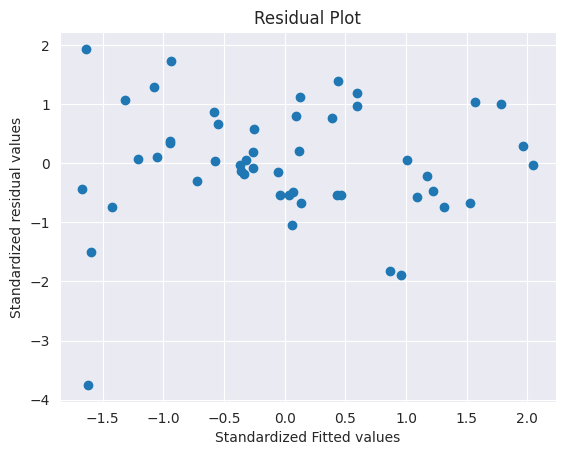

In [65]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show

#Residual Vs Regressors

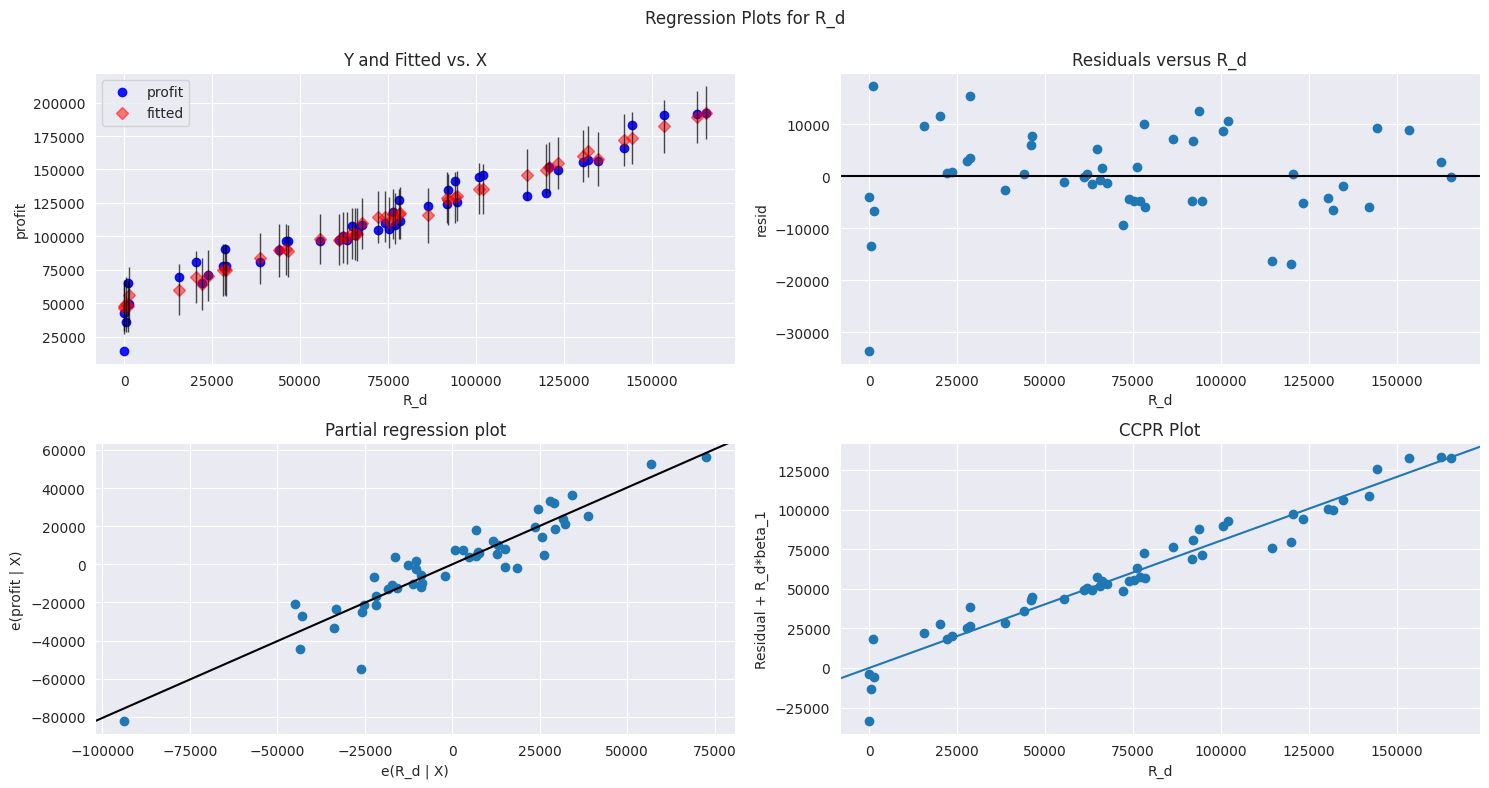

In [66]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "R_d", fig=fig)
plt.show()

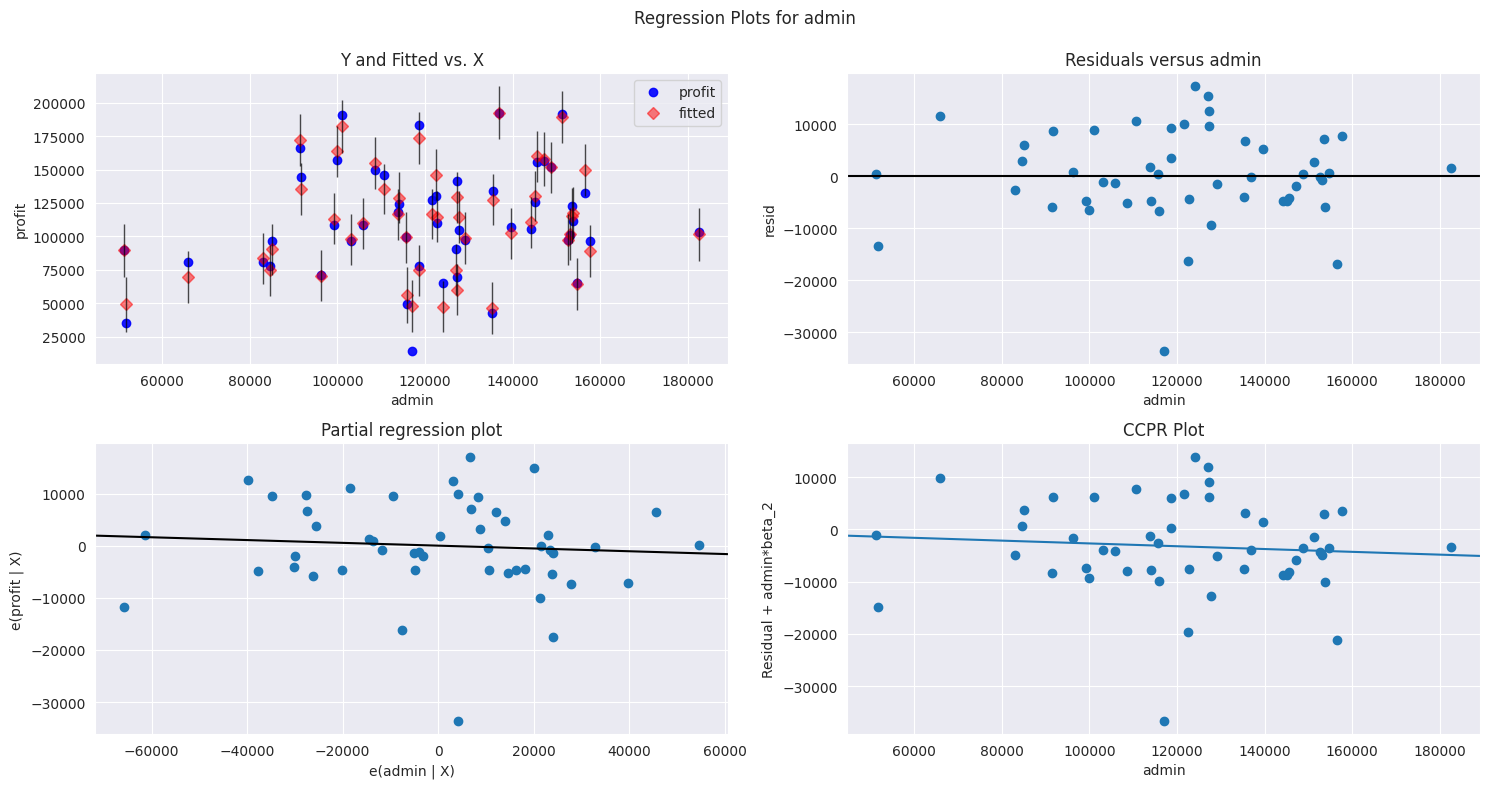

In [67]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "admin", fig=fig)
plt.show()

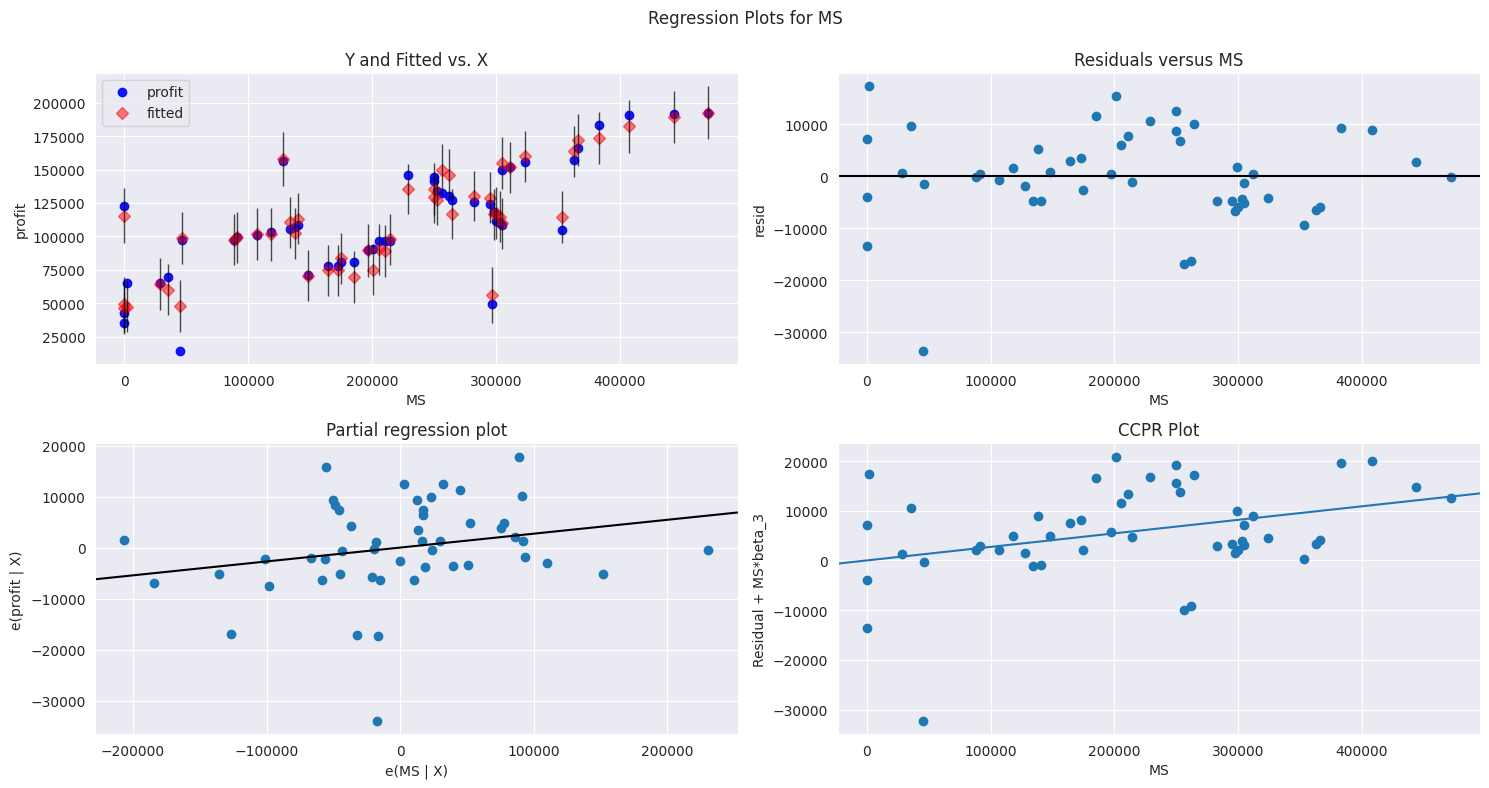

In [68]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "MS", fig=fig)
plt.show()

#Model Deletion Diagnostics

##Detecting Influencers/Outliers

##Cook’s Distance

In [69]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

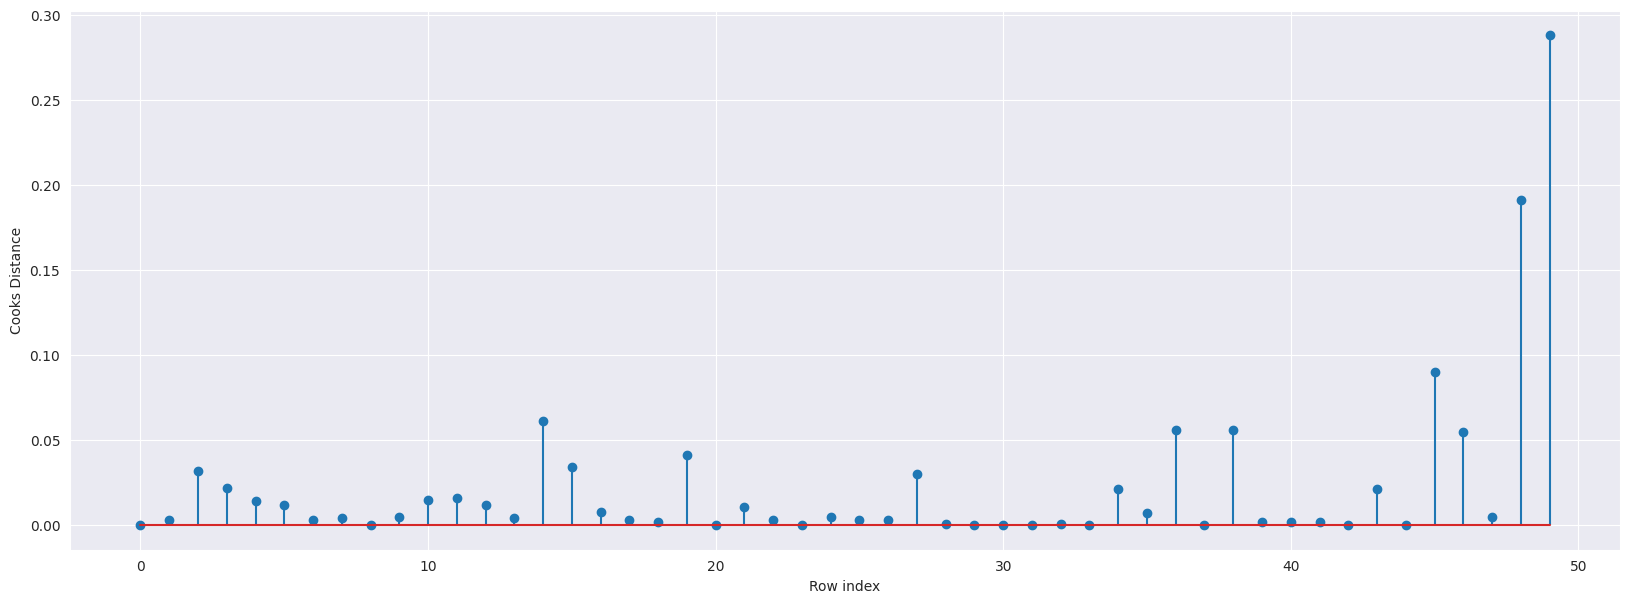

In [70]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(data1)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [71]:
(np.argmax(c),np.max(c))

(49, 0.2880822927543272)

##High Influence points

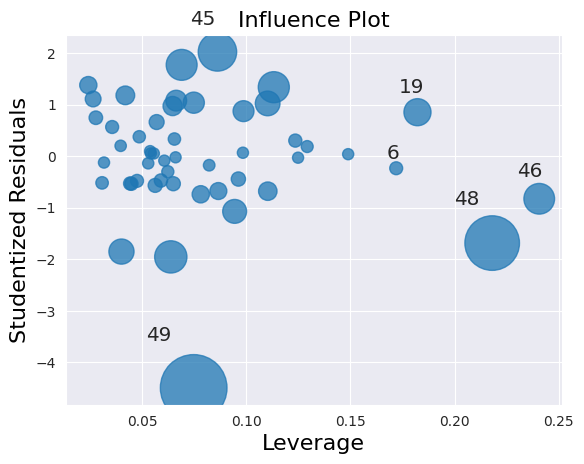

In [72]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.show()

In [73]:
# Leverage Cuttoff Value = 3*(k+1)/n ; k = no.of features/columns & n = no. of datapoints
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

###From the above plot, it is evident that data point 70 and 76 are the influencers

In [74]:
data1[data1.index.isin([46,48,49])]

,R_d,admin,MS,state,profit
46,1315.46,115816.21,297114.46,Florida,49490.75
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [75]:
# see the difference in R_d and other variable values
data1.head()

,R_d,admin,MS,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


# Improving the Model

In [79]:
data_new = data1.copy()

In [82]:
data2 = data_new.drop(data_new.index[[46,48,49]],axis = 0).reset_index(drop=True)
data2

,R_d,admin,MS,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


##Build model

In [85]:
#Exclude variable "R_d" and generate R-Squared and AIC values
final_ml_ad = smf.ols('profit ~ admin+MS',data = data2).fit()

In [86]:
final_ml_ad.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.647
Model:                            OLS   Adj. R-squared:                  0.631
Method:                 Least Squares   F-statistic:                     40.41
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.09e-10
Time:                        18:21:32   Log-Likelihood:                -534.61
No. Observations:                  47   AIC:                             1075.
Df Residuals:                      44   BIC:                             1081.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.863e+04    1.7e+04      1.684      0.099   -5630.659    6.29e+04
admin          0.2896      0.120      2.407      0.020       0.047       0.532
MS             0.2430      0.027      8.915      0.000       0.188       0.298
==============================================================================
Omnibus:                        1.240   Durbin-Watson:                   1.185
Prob(Omnibus):                  0.538   Jarque-Bera (JB):                0.849
Skew:                           0.329   Prob(JB):                        0.654
Kurtosis:                       3.016   Cond. No.                     1.45e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.45e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [87]:
final_ml_Rd = smf.ols('profit ~ R_d+MS',data = data2).fit()

In [88]:
final_ml_Rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.65e-31
Time:                        18:22:25   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
R_d            0.7439      0.037     19.902      0.000       0.669       0.819
MS             0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

##Cook's distance

In [89]:
model_influence_V = final_ml_Rd.get_influence()
(c_V, _) = model_influence_V.cooks_distance

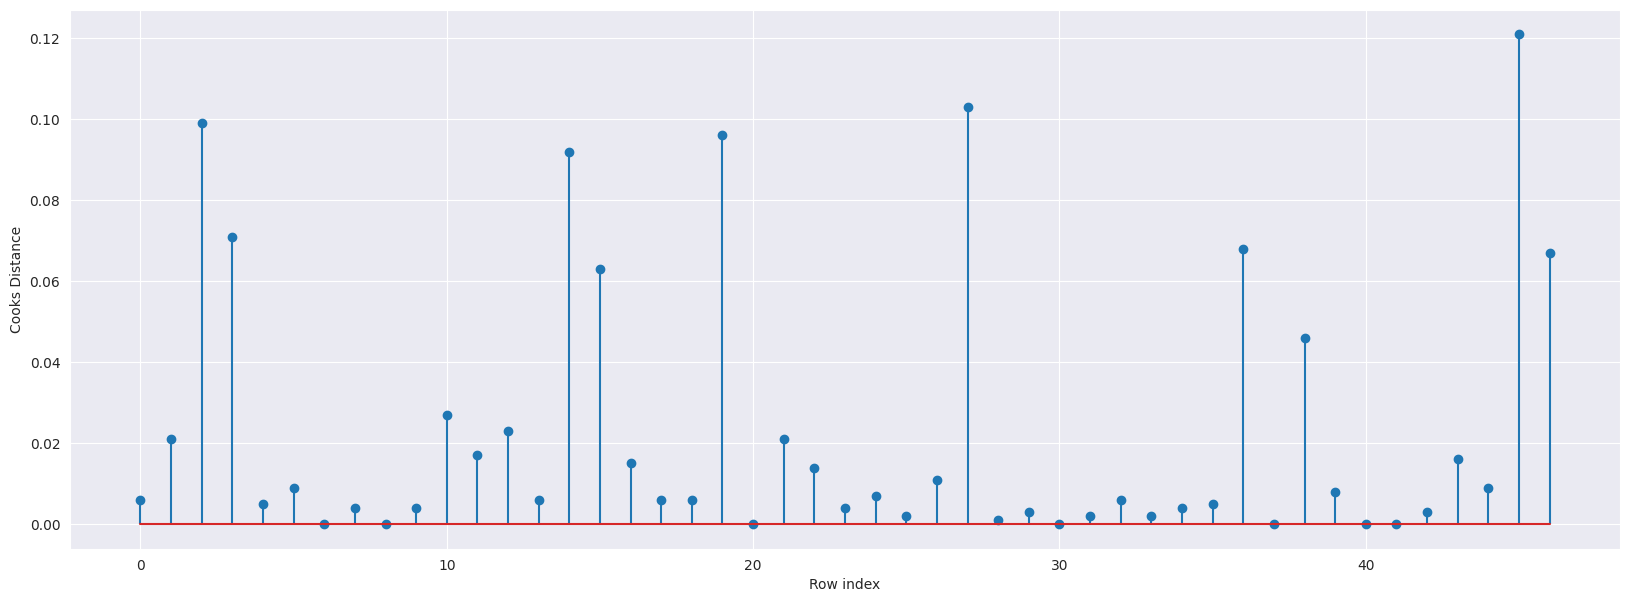

In [90]:
fig= plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)),np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

In [91]:
(np.argmax(c_V),np.max(c_V))

(45, 0.12080904032647966)

In [95]:
 data3 = data2.drop(data2.index[[45]],axis = 0).reset_index(drop=True)
data3


,R_d,admin,MS,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [96]:
final_ml_Rd.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.960
Model:                            OLS   Adj. R-squared:                  0.958
Method:                 Least Squares   F-statistic:                     529.6
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           1.65e-31
Time:                        18:29:30   Log-Likelihood:                -483.40
No. Observations:                  47   AIC:                             972.8
Df Residuals:                      44   BIC:                             978.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.171e+04   2358.725     21.924      0.000     4.7e+04    5.65e+04
R_d            0.7439      0.037     19.902      0.000       0.669       0.819
MS             0.0323      0.014      2.376      0.022       0.005       0.060
==============================================================================
Omnibus:                        0.086   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.958   Jarque-Bera (JB):                0.292
Skew:                           0.000   Prob(JB):                        0.864
Kurtosis:                       2.614   Cond. No.                     5.76e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [97]:
model_influence_d = final_ml_Rd.get_influence()
(c_V, _) = model_influence_d.cooks_distance

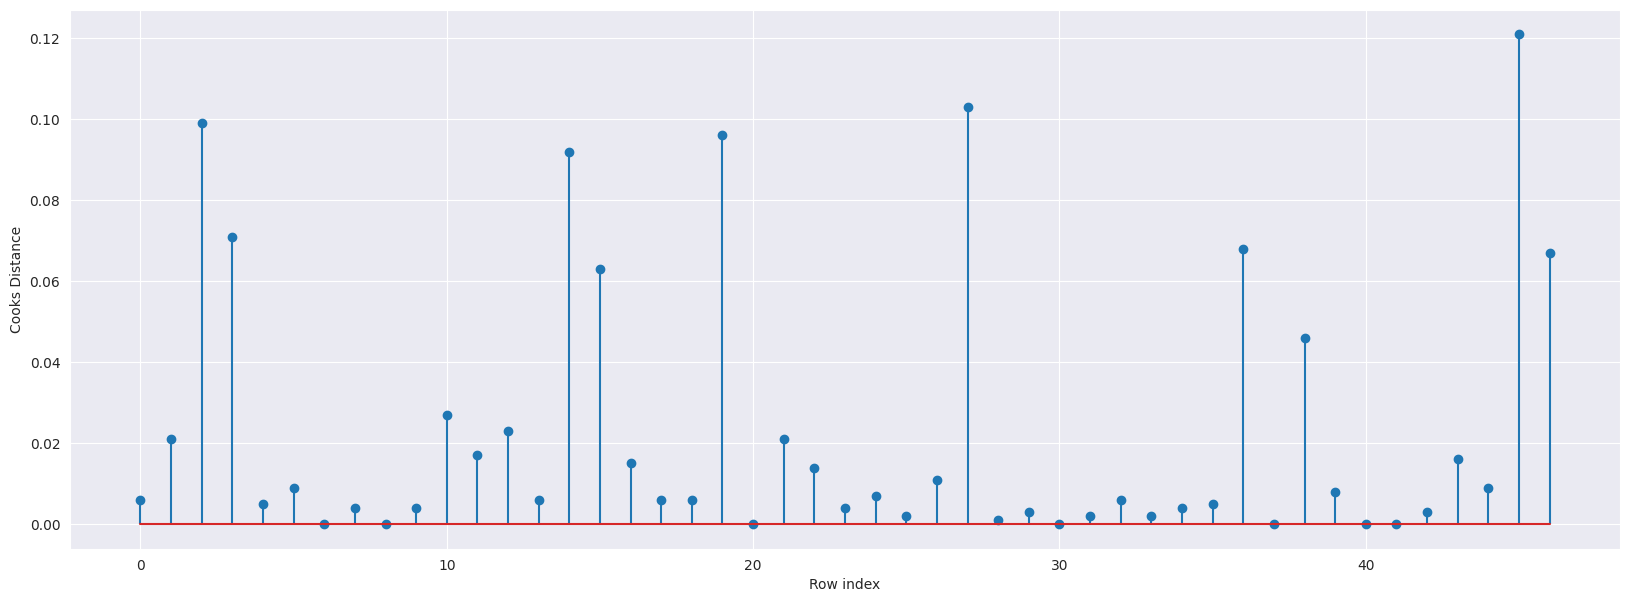

In [98]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
fig= plt.subplots(figsize=(20,7))
plt.stem(np.round(c_V,3));
plt.xlabel('Row index')
plt.ylabel('Cooks Distance');

##Model Deletion Diagoniostics & Final Model

In [103]:
Final_Model = smf.ols('profit~R_d+admin+MS',data=data3).fit()
Final_Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     360.3
Date:                Mon, 26 Feb 2024   Prob (F-statistic):           5.56e-30
Time:                        18:36:16   Log-Likelihood:                -471.03
No. Observations:                  46   AIC:                             950.1
Df Residuals:                      42   BIC:                             957.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.69e+04   5788.198      9.830      0.000    4.52e+04    6.86e+04
R_d            0.7714      0.040     19.320      0.000       0.691       0.852
admin         -0.0540      0.043     -1.254      0.217      -0.141       0.033
MS             0.0277      0.014      1.916      0.062      -0.001       0.057
==============================================================================
Omnibus:                        0.094   Durbin-Watson:                   1.745
Prob(Omnibus):                  0.954   Jarque-Bera (JB):                0.291
Skew:                          -0.053   Prob(JB):                        0.865
Kurtosis:                       2.625   Cond. No.                     1.59e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.59e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [104]:
Final_Model.rsquared

0.962593650298269